# Vérification du codage des termes sources turbulents et de la diffusion

In [1]:
from trustutils import run 
from trustutils import visit
from trustutils.jupyter import plot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
build_dir=run.BUILD_DIRECTORY

run.introduction("C. Reiss","16/03/2022")
run.TRUST_parameters()

## Introduction 
 Validation made by : C. Reiss



 Report created : 16/03/2022



 Report generated 01/03/2023

### TRUST parameters 
 * Version TRUST: 1.9.2_beta
 * Binary used: /volatile/catB/cr268029/triocfd/Multiphase/CMFD/CMFD_opt (built in directory /volatile/catB/cr268029/triocfd/Multiphase/CMFD/share/Validation/Rapports_automatiques/Verification_k_tau_omega_transport_equation/build)

## Description
Reprise d'un vieux cas de valid k-eps pour k-tau et k-omega. On verifie qu'on obtient une forme similaire de termes sources. Description du vieux cas : The present verification report aims at checking the post-processing of the convective, diffusive and source terms of the $k-\epsilon$ transport equations for the standard and realizable models, and for VDF and VEF discretizations. No numerical resolution is performed.

### Initial conditions

Periodic velocity, turbulent kinetic energy and turbulent dissipation fields defined by the following analytical expressions: 
\begin{equation*}
\left\{\begin{array}{ll}
\text{velocity vector: } & \textbf{u}(x,y,z) = \displaystyle{ \begin{pmatrix} -2 \cos(2\pi x) \sin(2\pi y) \sin(2\pi z) \\\\ \sin(2\pi x) \cos(2\pi y) \sin(2\pi z) \\\\ \sin(2\pi x) \sin(2\pi y) \cos(2\pi z) \end{pmatrix}} 
\\\\ \text{turbulent kinetic energy: } & k(x,y,z) = \cos(2 \pi y)+2 \\\\ \text{turbulent dissipation rate: } & \varepsilon(x,y,z) = \sin(2 \pi y)+2 
\\\\ \text{turbulent dissipation time scale: } & \tau(x,y,z) = \frac{\cos(2 \pi y)+2}{\sin(2 \pi y)+2} 
\\\\ \text{turbulent dissipation rate: } & \omega(x,y,z) = \frac{\sin(2 \pi y)+2}{\cos(2 \pi y)+2} \end{array}\right.
\end{equation*}

### Issues
The velocity gradient isn't well calculated when a cell is next to multiple "frontiere_ouverte_vitesse_imposee_sortie" boundary faces.
This results in an over-production of turbulent kinetic energy along the corners of the cube in VDF. Another consequence is that the turbulent kinetic energy convection is off there as well.
This doesn't affect many cells, and such boundary conditions are virtually never used in applications.


In [2]:
from trustutils import run 

run.reset()
run.addCase("K_TAU","K_TAU.data")
run.addCase("K_OMEGA","K_OMEGA.data")
run.addCase("K_OMEGA_VDF","K_OMEGA_VDF.data")

run.printCases()
run.runCases()

### Test cases 
* K_TAU/K_TAU.data : 
* K_OMEGA/K_OMEGA.data : 
* K_OMEGA_VDF/K_OMEGA_VDF.data : 


Running ...
  => A total of 3 cases were (successfully) run in 11.0s.


## Valeurs de v, k, tau et omega le long d'un bord

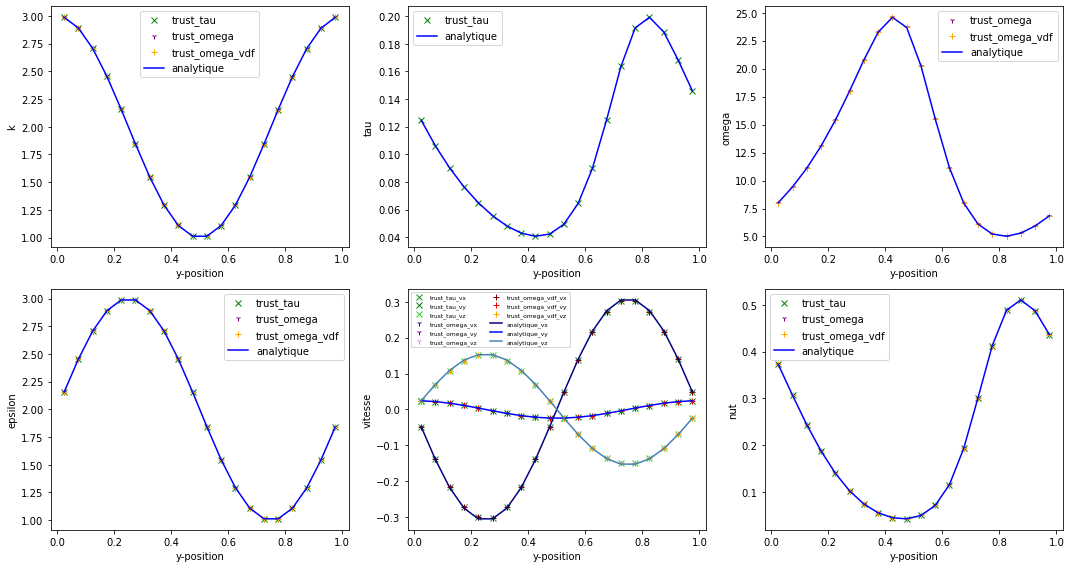

In [3]:
x = np.linspace(0.025,0.025, 20)
y = np.linspace(0.025,0.975, 20)
z = np.linspace(0.025,0.025, 20)

k= plot.loadText("K_TAU/K_TAU_K_BORD.son")[1::, -1]
tau= plot.loadText("K_TAU/K_TAU_TAU_BORD.son")[1::, -1]
epsilon= plot.loadText("K_TAU/K_TAU_EPSILON_BORD.son")[1::, -1]
vx= plot.loadText("K_TAU/K_TAU_VITESSEX_BORD.son")[1::, -1]
vy= plot.loadText("K_TAU/K_TAU_VITESSEY_BORD.son")[1::, -1]
vz= plot.loadText("K_TAU/K_TAU_VITESSEZ_BORD.son")[1::, -1]
nut = plot.loadText("K_TAU/K_TAU_NUT_BORD.son")[1::, -1]

ko= plot.loadText("K_OMEGA/K_OMEGA_K_BORD.son")[1::, -1]
omega= plot.loadText("K_OMEGA/K_OMEGA_OMEGA_BORD.son")[1::, -1]
epsilono= plot.loadText("K_OMEGA/K_OMEGA_EPSILON_BORD.son")[1::, -1]
vxo= plot.loadText("K_OMEGA/K_OMEGA_VITESSEX_BORD.son")[1::, -1]
vyo= plot.loadText("K_OMEGA/K_OMEGA_VITESSEY_BORD.son")[1::, -1]
vzo= plot.loadText("K_OMEGA/K_OMEGA_VITESSEZ_BORD.son")[1::, -1]
nuto = plot.loadText("K_OMEGA/K_OMEGA_NUT_BORD.son")[1::, -1]

kov= plot.loadText("K_OMEGA_VDF/K_OMEGA_VDF_K_BORD.son")[1::, -1]
omegav= plot.loadText("K_OMEGA_VDF/K_OMEGA_VDF_OMEGA_BORD.son")[1::, -1]
epsilonov= plot.loadText("K_OMEGA_VDF/K_OMEGA_VDF_EPSILON_BORD.son")[1::, -1]
vxov= plot.loadText("K_OMEGA_VDF/K_OMEGA_VDF_VITESSEX_BORD.son")[1::, -1]
vyov= plot.loadText("K_OMEGA_VDF/K_OMEGA_VDF_VITESSEY_BORD.son")[1::, -1]
vzov= plot.loadText("K_OMEGA_VDF/K_OMEGA_VDF_VITESSEZ_BORD.son")[1::, -1]
nutov = plot.loadText("K_OMEGA_VDF/K_OMEGA_VDF_NUT_BORD.son")[1::, -1]

k_ana = np.cos(2*3.14*y)+2
tau_ana = (np.cos(2*3.14*y)+2)/(np.sin(2*3.14*y)+2)*0.09
omega_ana = 1/tau_ana
epsilon_ana = np.sin(2*3.14*y)+2
vx_ana = -2*np.cos(2*3.14*x)*np.sin(2*3.14*y)*np.sin(2*3.14*z)
vy_ana = np.sin(2*3.14*x)*np.cos(2*3.14*y)*np.sin(2*3.14*z) 
vz_ana = np.sin(2*3.14*x)*np.sin(2*3.14*y)*np.cos(2*3.14*z) 
nut_ana = k_ana*tau_ana

fig = plt.figure(figsize=(15,8))

plt.title("Verification of initial conditions")

plt.subplot(231)
plt.plot(y, k, 'xg', label = 'trust_tau')
plt.plot(y, ko, "1", label = 'trust_omega', color = "purple")
plt.plot(y, kov,"+", label = 'trust_omega_vdf', color = "orange")
plt.plot(y, k_ana, '-b', label = 'analytique')
plt.xlabel('y-position')
plt.ylabel('k')
plt.legend()

plt.subplot(232)
plt.plot(y, tau, 'xg', label = 'trust_tau')
plt.plot(y, tau_ana, '-b', label = 'analytique')
plt.xlabel('y-position')
plt.ylabel('tau')
plt.legend()

plt.subplot(233)
plt.plot(y, omega, "1", label = 'trust_omega', color = "purple")
plt.plot(y, omegav, "+", label = 'trust_omega_vdf', color = "orange")
plt.plot(y, omega_ana, '-b', label = 'analytique')
plt.xlabel('y-position')
plt.ylabel('omega')
plt.legend()


plt.subplot(234)
plt.plot(y, epsilon, 'xg', label = 'trust_tau')
plt.plot(y, epsilono,"1", label = 'trust_omega',  color = "purple")
plt.plot(y, epsilonov,"+", label = 'trust_omega_vdf',  color = "orange")
plt.plot(y, epsilon_ana, '-b', label = 'analytique')
plt.xlabel('y-position')
plt.ylabel('epsilon')
plt.legend()

plt.subplot(235)
plt.plot(y, vx, 'x', label = 'trust_tau_vx', color = "forestgreen")
plt.plot(y, vy, 'x', label = 'trust_tau_vy', color = "green")
plt.plot(y, vz, 'x', label = 'trust_tau_vz', color = "limegreen")
plt.plot(y, vxo, "1", label = 'trust_omega_vx', color = "indigo")
plt.plot(y, vyo, "1", label = 'trust_omega_vy', color = "purple")
plt.plot(y, vzo, "1", label = 'trust_omega_vz', color = "violet")
plt.plot(y, vxov, "+", label = 'trust_omega_vdf_vx', color = "maroon")
plt.plot(y, vyov, "+", label = 'trust_omega_vdf_vy', color = "red")
plt.plot(y, vzov, "+", label = 'trust_omega_vdf_vz', color = "orange")
plt.plot(y, vx_ana, '-', label = 'analytique_vx', color = "navy")
plt.plot(y, vy_ana, '-', label = 'analytique_vy', color = "blue")
plt.plot(y, vz_ana, '-', label = 'analytique_vz', color = "steelblue")
plt.xlabel('y-position')
plt.ylabel('vitesse')
plt.legend(fontsize = 6, ncol = 2)

plt.subplot(236)
plt.plot(y, np.array(nut)/1000, 'x', label = 'trust_tau', color = "green")
plt.plot(y, np.array(nuto)/1000, "1", label = 'trust_omega', color = "purple")
plt.plot(y, np.array(nutov)/1000, "+", label = 'trust_omega_vdf', color = "orange")
plt.plot(y, nut_ana, '-', label = 'analytique', color = "blue")
plt.xlabel('y-position')
plt.ylabel('nut')

plt.legend()
plt.tight_layout()

plt.show()


## Termes sources de l'equation de k : verification que notre calcul analytique est similaire a celui de triocfd dans les mailles de bord et comparaison avec CMFD sans periodique

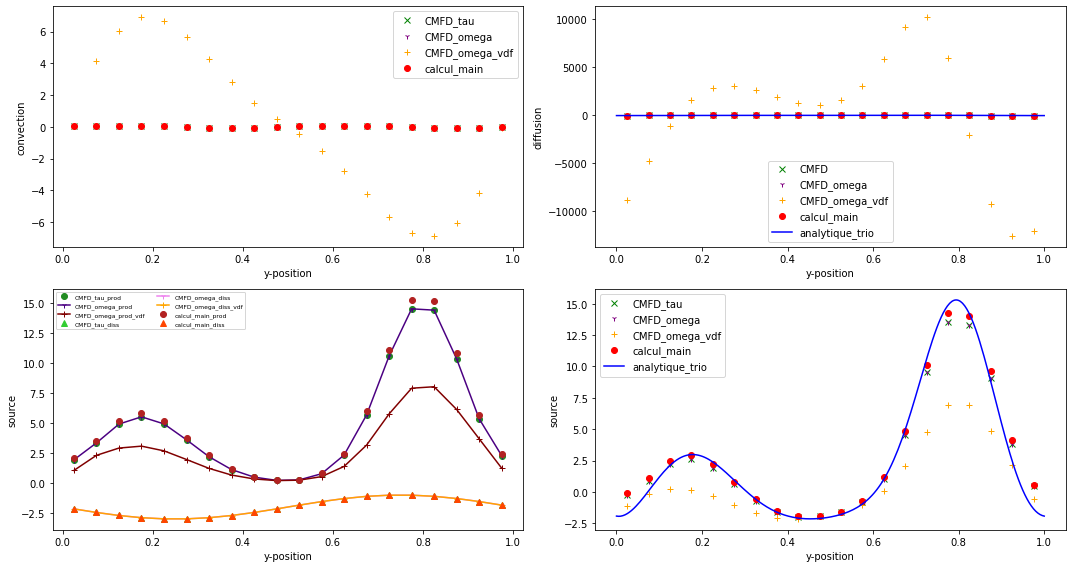

In [4]:
convk_ana = pd.read_csv(f"{build_dir}/Profils_analytiques/VDF_conv_tke_standard.dat", sep='\t', names=["y", "val"])
diffk_ana = pd.read_csv(f"{build_dir}/Profils_analytiques/VDF_diff_tke_standard.dat", sep='\t', names=["y", "val"])
sourcek_ana = pd.read_csv(f"{build_dir}/Profils_analytiques/VDF_source_tke_standard.dat", sep='\t', names=["y", "val"])
convk = plot.loadText("K_TAU/K_TAU_CONV_K_BORD.son")[1::, -1]
diffk = plot.loadText("K_TAU/K_TAU_DIFF_K_BORD.son")[1::, -1]
prodk = plot.loadText("K_TAU/K_TAU_PROD_K_BORD.son")[1::, -1]
dissk = plot.loadText("K_TAU/K_TAU_DISS_K_BORD.son")[1::, -1]
convko = plot.loadText("K_OMEGA/K_OMEGA_CONV_K_BORD.son")[1::, -1]
diffko = plot.loadText("K_OMEGA/K_OMEGA_DIFF_K_BORD.son")[1::, -1]
prodko = plot.loadText("K_OMEGA/K_OMEGA_PROD_K_BORD.son")[1::, -1]
dissko = plot.loadText("K_OMEGA/K_OMEGA_DISS_K_BORD.son")[1::, -1]
convkov= plot.loadText("K_OMEGA_VDF/K_OMEGA_VDF_CONV_K_BORD.son")[1::, -1]
diffkov= plot.loadText("K_OMEGA_VDF/K_OMEGA_VDF_DIFF_K_BORD.son")[1::, -1]
prodkov= plot.loadText("K_OMEGA_VDF/K_OMEGA_VDF_PROD_K_BORD.son")[1::, -1]
disskov= plot.loadText("K_OMEGA_VDF/K_OMEGA_VDF_DISS_K_BORD.son")[1::, -1]


sourcek = np.array(prodk)+np.array(dissk)
sourceko= np.array(prodko)+np.array(dissko)
sourcekov= np.array(prodkov)+np.array(disskov)

dy_k_ana = -2*3.14*np.sin(2*3.14*y)
dy_tau_ana = 0.09 * ( -2*3.14*np.sin(2*3.14*y)/(np.sin(2*3.14*y)+2) + (np.cos(2*3.14*y)+2)*2*3.14*np.cos(2*3.14*y)*(-1)/(np.sin(2*3.14*y)+2)**2)

conv_k_calc = - dy_k_ana * vy_ana
diff_k_calc = 1.*(-k_ana*tau_ana*4*3.14**2*np.cos(2*3.14*y)+dy_k_ana*(dy_k_ana*tau_ana+dy_tau_ana*k_ana))
diss_k_calc = - 0.09 * k_ana / tau_ana

# In the trio test case, the pr number for k is 1 and for us 0.67
diffk = np.array(diffk)/0.67
diffko = np.array(diffko)/0.67

dx_vx_ana = 2*2*3.14*np.sin(2*3.14*x)*np.sin(2*3.14*y)*np.sin(2*3.14*z)
dy_vx_ana = -2*np.cos(2*3.14*x)*2*3.14*np.cos(2*3.14*y)*np.sin(2*3.14*z)
dz_vx_ana = -2*np.cos(2*3.14*x)*np.sin(2*3.14*y)*2*3.14*np.cos(2*3.14*z)
dx_vy_ana = 2*3.14*np.cos(2*3.14*x)*np.cos(2*3.14*y)*np.sin(2*3.14*z) 
dy_vy_ana = np.sin(2*3.14*x)*2*3.14*-np.sin(2*3.14*y)*np.sin(2*3.14*z) 
dz_vy_ana = np.sin(2*3.14*x)*np.cos(2*3.14*y)*2*3.14*np.cos(2*3.14*z) 
dx_vz_ana = 2*3.14*np.cos(2*3.14*x)*np.sin(2*3.14*y)*np.cos(2*3.14*z) 
dy_vz_ana = np.sin(2*3.14*x)*2*3.14*np.cos(2*3.14*y)*np.cos(2*3.14*z) 
dz_vz_ana = np.sin(2*3.14*x)*np.sin(2*3.14*y)*2*3.14*-np.sin(2*3.14*z) 

prod_k_calc = (
     ((dx_vx_ana + dx_vx_ana)*nut_ana - 2/3*k_ana)*dx_vx_ana
    + (dy_vx_ana + dx_vy_ana)*nut_ana*dy_vx_ana
    + (dz_vx_ana + dx_vz_ana)*nut_ana*dz_vx_ana
    + (dx_vy_ana + dy_vx_ana)*nut_ana*dx_vy_ana
    +((dy_vy_ana + dy_vy_ana)*nut_ana - 2/3*k_ana)*dy_vy_ana
    + (dz_vy_ana + dy_vz_ana)*nut_ana*dz_vy_ana
    + (dx_vz_ana + dz_vx_ana)*nut_ana*dx_vz_ana
    + (dy_vz_ana + dz_vy_ana)*nut_ana*dy_vz_ana
    +((dz_vz_ana + dz_vz_ana)*nut_ana - 2/3*k_ana)*dz_vz_ana
)

fig = plt.figure(figsize=(15,8))

plt.title("Verification of initial conditions")

plt.subplot(221)
plt.plot(y, convk, 'xg', label = 'CMFD_tau')
plt.plot(y, convko, "1", label = 'CMFD_omega', color = "purple")
#plt.plot(y, convkov, "+", label = 'CMFD_omega_vdf', color = "orange")
plt.plot(y, conv_k_calc, 'or', label = 'calcul_main')
# The following term is at z = 0.005, while our calculation is at z = 0.025 => ignore it
#plt.plot(convk_ana["y"], -np.array(convk_ana["val"]), '-b', label = 'analytique_trio')
plt.xlabel('y-position')
plt.ylabel('convection')
plt.legend()

plt.subplot(222)
plt.plot(y, diffk, 'xg', label = 'CMFD')
plt.plot(y, diffko, "1", label = 'CMFD_omega', color = "purple")
plt.plot(y, diffkov, "+", label = 'CMFD_omega_vdf', color = "orange")
plt.plot(y, diff_k_calc, 'or', label = 'calcul_main')
plt.plot(diffk_ana["y"], diffk_ana["val"], '-b', label = 'analytique_trio')
plt.xlabel('y-position')
plt.ylabel('diffusion')
plt.legend()

plt.subplot(223)
plt.plot(y, prodk, 'o', label = 'CMFD_tau_prod', color ="forestgreen")
plt.plot(y, prodko, label = 'CMFD_omega_prod', marker = "1", color = "indigo")
plt.plot(y, prodkov, label = 'CMFD_omega_prod_vdf', marker = "+", color = "maroon")
plt.plot(y, dissk, '^', label = 'CMFD_tau_diss', color ="limegreen")
plt.plot(y, dissko, label = 'CMFD_omega_diss', marker = "1", color = "violet")
plt.plot(y, disskov, label = 'CMFD_omega_diss_vdf', marker = "+", color = "orange")
plt.plot(y, prod_k_calc, 'o', label = 'calcul_main_prod', color ="firebrick")
plt.plot(y, diss_k_calc, '^', label = 'calcul_main_diss', color ="orangered")
plt.xlabel('y-position')
plt.ylabel('source')
plt.legend(fontsize = 6, ncol = 2)

plt.subplot(224)
plt.plot(y, sourcek, 'xg', label = 'CMFD_tau')
plt.plot(y, sourceko,"1",  label = 'CMFD_omega', color = "purple")
plt.plot(y, sourcekov,"+",  label = 'CMFD_omega_vdf', color = "orange")
plt.plot(y, prod_k_calc+diss_k_calc, 'or', label = 'calcul_main')
plt.plot(sourcek_ana["y"], sourcek_ana["val"], '-b', label = 'analytique_trio')
plt.xlabel('y-position')
plt.ylabel('source')

plt.legend()
plt.tight_layout()

plt.show()



## Termes sources de l'equation de k : verification que notre calcul analytique est similaire a celui de CMFD au milieu du cube

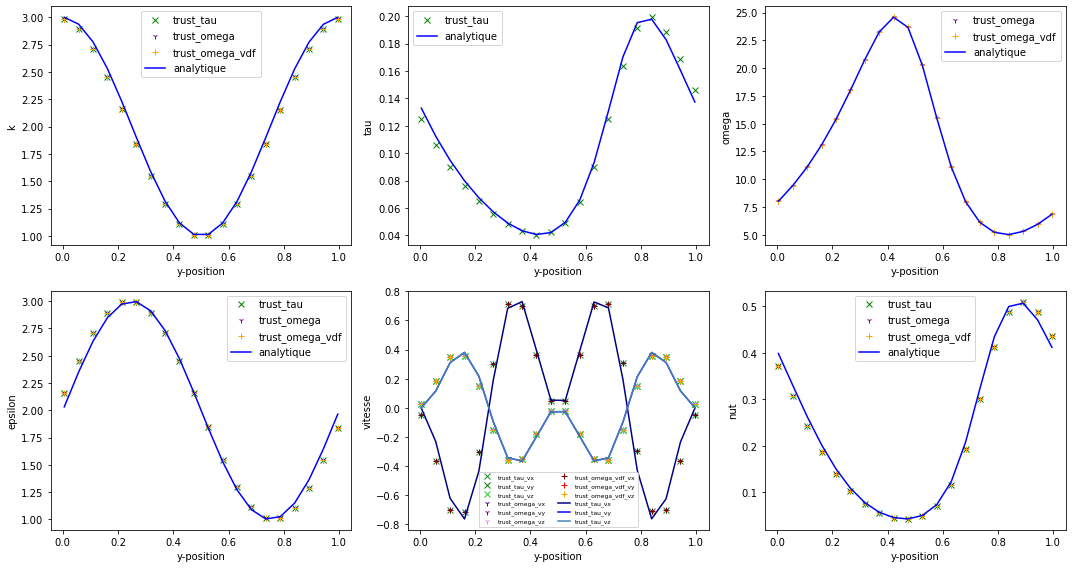

In [5]:
x = np.linspace(0.005,0.995, 20)
y = np.linspace(0.005,0.995, 20)
z = np.linspace(0.005,0.995, 20)

k_ana = np.cos(2*3.14*y)+2
tau_ana = (np.cos(2*3.14*y)+2)/(np.sin(2*3.14*y)+2)*0.09
epsilon_ana = np.sin(2*3.14*y)+2
vx_ana = -2*np.cos(2*3.14*x)*np.sin(2*3.14*y)*np.sin(2*3.14*z)
vy_ana = np.sin(2*3.14*x)*np.cos(2*3.14*y)*np.sin(2*3.14*z) 
vz_ana = np.sin(2*3.14*x)*np.sin(2*3.14*y)*np.cos(2*3.14*z) 
nut_ana = k_ana*tau_ana

k= plot.loadText("K_TAU/K_TAU_K.son")[1::, -1]
tau= plot.loadText("K_TAU/K_TAU_TAU.son")[1::, -1]
epsilon= plot.loadText("K_TAU/K_TAU_EPSILON.son")[1::, -1]
vx= plot.loadText("K_TAU/K_TAU_VITESSEX.son")[1::, -1]
vy= plot.loadText("K_TAU/K_TAU_VITESSEY.son")[1::, -1]
vz= plot.loadText("K_TAU/K_TAU_VITESSEZ.son")[1::, -1]
nut = plot.loadText("K_TAU/K_TAU_NUT.son")[1::, -1]

ko= plot.loadText("K_OMEGA/K_OMEGA_K.son")[1::, -1]
omega= plot.loadText("K_OMEGA/K_OMEGA_OMEGA.son")[1::, -1]
epsilono= plot.loadText("K_OMEGA/K_OMEGA_EPSILON.son")[1::, -1]
vxo= plot.loadText("K_OMEGA/K_OMEGA_VITESSEX.son")[1::, -1]
vyo= plot.loadText("K_OMEGA/K_OMEGA_VITESSEY.son")[1::, -1]
vzo= plot.loadText("K_OMEGA/K_OMEGA_VITESSEZ.son")[1::, -1]
nuto = plot.loadText("K_OMEGA/K_OMEGA_NUT.son")[1::, -1]

kov= plot.loadText("K_OMEGA_VDF/K_OMEGA_VDF_K.son")[1::, -1]
omegav= plot.loadText("K_OMEGA_VDF/K_OMEGA_VDF_OMEGA.son")[1::, -1]
epsilonov= plot.loadText("K_OMEGA_VDF/K_OMEGA_VDF_EPSILON.son")[1::, -1]
vxov= plot.loadText("K_OMEGA_VDF/K_OMEGA_VDF_VITESSEX.son")[1::, -1]
vyov= plot.loadText("K_OMEGA_VDF/K_OMEGA_VDF_VITESSEY.son")[1::, -1]
vzov= plot.loadText("K_OMEGA_VDF/K_OMEGA_VDF_VITESSEZ.son")[1::, -1]
nutov = plot.loadText("K_OMEGA_VDF/K_OMEGA_VDF_NUT.son")[1::, -1]

fig = plt.figure(figsize=(15,8))

plt.title("Verification of initial conditions")

plt.subplot(231)
plt.plot(y, k, 'xg', label = 'trust_tau')
plt.plot(y, ko, "1", label = 'trust_omega', color = "purple")
plt.plot(y, kov, "+", label = 'trust_omega_vdf', color = "orange")
plt.plot(y, k_ana, '-b', label = 'analytique')
plt.xlabel('y-position')
plt.ylabel('k')
plt.legend()

plt.subplot(232)
plt.plot(y, tau, 'xg', label = 'trust_tau')
plt.plot(y, tau_ana, '-b', label = 'analytique')
plt.xlabel('y-position')
plt.ylabel('tau')
plt.legend()

plt.subplot(233)
plt.plot(y, omega, "1", label = 'trust_omega', color = "purple")
plt.plot(y, omegav, "+", label = 'trust_omega_vdf', color = "orange")
plt.plot(y, omega_ana, '-b', label = 'analytique')
plt.xlabel('y-position')
plt.ylabel('omega')
plt.legend()

plt.subplot(234)
plt.plot(y, epsilon, 'xg', label = 'trust_tau')
plt.plot(y, epsilono, "1", label = 'trust_omega', color = "purple")
plt.plot(y, epsilonov, "+", label = 'trust_omega_vdf', color = "orange")
plt.plot(y, epsilon_ana, '-b', label = 'analytique')
plt.xlabel('y-position')
plt.ylabel('epsilon')
plt.legend()

plt.subplot(235)
plt.plot(y, vx, 'x', label = 'trust_tau_vx', color = "forestgreen")
plt.plot(y, vy, 'x', label = 'trust_tau_vy', color = "green")
plt.plot(y, vz, 'x', label = 'trust_tau_vz', color = "limegreen")
plt.plot(y, vxo, "1", label = 'trust_omega_vx', color = "indigo")
plt.plot(y, vyo, "1", label = 'trust_omega_vy', color = "purple")
plt.plot(y, vzo, "1", label = 'trust_omega_vz', color = "violet")
plt.plot(y, vxov, "+", label = 'trust_omega_vdf_vx', color = "maroon")
plt.plot(y, vyov, "+", label = 'trust_omega_vdf_vy', color = "red")
plt.plot(y, vzov, "+", label = 'trust_omega_vdf_vz', color = "orange")
plt.plot(y, vx_ana, '-', label = 'trust_tau_vx', color = "navy")
plt.plot(y, vy_ana, '-', label = 'trust_tau_vy', color = "blue")
plt.plot(y, vz_ana, '-', label = 'trust_tau_vz', color = "steelblue")
plt.xlabel('y-position')
plt.ylabel('vitesse')
plt.legend(fontsize = 6, ncol = 2)

plt.subplot(236)
plt.plot(y, np.array(nut)/1000, 'x', label = 'trust_tau', color = "green")
plt.plot(y, np.array(nuto)/1000, "1", label = 'trust_omega', color = "purple")
plt.plot(y, np.array(nuto)/1000, "+", label = 'trust_omega_vdf', color = "orange")
plt.plot(y, nut_ana, '-', label = 'analytique', color = "blue")
plt.xlabel('y-position')
plt.ylabel('nut')


plt.legend()
plt.tight_layout()

plt.show()


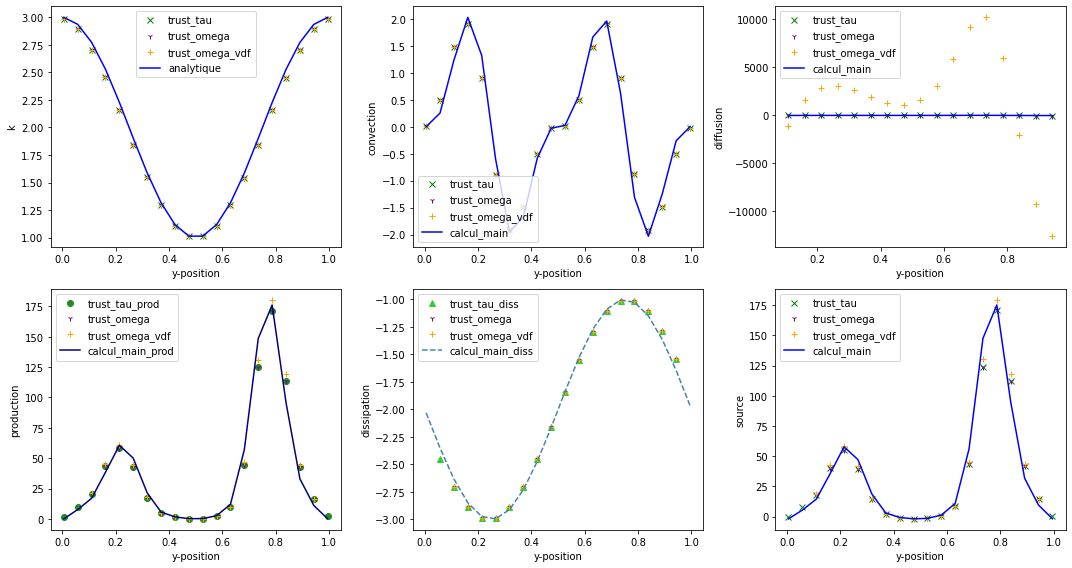

In [6]:
convk = plot.loadText("K_TAU/K_TAU_CONV_K.son")[1::, -1]
diffk = plot.loadText("K_TAU/K_TAU_DIFF_K.son")[1::, -1]
prodk = plot.loadText("K_TAU/K_TAU_PROD_K.son")[1::, -1]
dissk = plot.loadText("K_TAU/K_TAU_DISS_K.son")[1::, -1]
convko = plot.loadText("K_OMEGA/K_OMEGA_CONV_K.son")[1::, -1]
diffko = plot.loadText("K_OMEGA/K_OMEGA_DIFF_K.son")[1::, -1]
prodko = plot.loadText("K_OMEGA/K_OMEGA_PROD_K.son")[1::, -1]
dissko = plot.loadText("K_OMEGA/K_OMEGA_DISS_K.son")[1::, -1]
convkov= plot.loadText("K_OMEGA_VDF/K_OMEGA_VDF_CONV_K.son")[1::, -1]
diffkov= plot.loadText("K_OMEGA_VDF/K_OMEGA_VDF_DIFF_K.son")[1::, -1]
prodkov= plot.loadText("K_OMEGA_VDF/K_OMEGA_VDF_PROD_K.son")[1::, -1]
disskov= plot.loadText("K_OMEGA_VDF/K_OMEGA_VDF_DISS_K.son")[1::, -1]

sourcek = np.array(prodk)+np.array(dissk)
sourceko = np.array(prodko)+np.array(dissko)
sourcekov = np.array(prodkov)+np.array(disskov)

dy_k_ana = -2*3.14*np.sin(2*3.14*y)
dy_tau_ana = 0.09 * ( -2*3.14*np.sin(2*3.14*y)/(np.sin(2*3.14*y)+2) + (np.cos(2*3.14*y)+2)*2*3.14*np.cos(2*3.14*y)*(-1)/(np.sin(2*3.14*y)+2)**2)

conv_k_calc = - dy_k_ana * vy_ana
diff_k_calc = 0.67*(-k_ana*tau_ana*4*3.14**2*np.cos(2*3.14*y)+dy_k_ana*(dy_k_ana*tau_ana+dy_tau_ana*k_ana))
diss_k_calc = - 0.09 * k_ana / tau_ana

nut_ana = np.maximum(k_ana*tau_ana, 1e-8)

dx_vx_ana = 2*2*3.14*np.sin(2*3.14*x)*np.sin(2*3.14*y)*np.sin(2*3.14*z)
dy_vx_ana = -2*np.cos(2*3.14*x)*2*3.14*np.cos(2*3.14*y)*np.sin(2*3.14*z)
dz_vx_ana = -2*np.cos(2*3.14*x)*np.sin(2*3.14*y)*2*3.14*np.cos(2*3.14*z)
dx_vy_ana = 2*3.14*np.cos(2*3.14*x)*np.cos(2*3.14*y)*np.sin(2*3.14*z) 
dy_vy_ana = np.sin(2*3.14*x)*2*3.14*-np.sin(2*3.14*y)*np.sin(2*3.14*z) 
dz_vy_ana = np.sin(2*3.14*x)*np.cos(2*3.14*y)*2*3.14*np.cos(2*3.14*z) 
dx_vz_ana = 2*3.14*np.cos(2*3.14*x)*np.sin(2*3.14*y)*np.cos(2*3.14*z) 
dy_vz_ana = np.sin(2*3.14*x)*2*3.14*np.cos(2*3.14*y)*np.cos(2*3.14*z) 
dz_vz_ana = np.sin(2*3.14*x)*np.sin(2*3.14*y)*2*3.14*-np.sin(2*3.14*z) 

prod_k_calc = (
     ((dx_vx_ana + dx_vx_ana)*k_ana*tau_ana - 2/3*k_ana)*dx_vx_ana
    + (dy_vx_ana + dx_vy_ana)*k_ana*tau_ana*dy_vx_ana
    + (dz_vx_ana + dx_vz_ana)*k_ana*tau_ana*dz_vx_ana
    + (dx_vy_ana + dy_vx_ana)*k_ana*tau_ana*dx_vy_ana
    +((dy_vy_ana + dy_vy_ana)*k_ana*tau_ana - 2/3*k_ana)*dy_vy_ana
    + (dz_vy_ana + dy_vz_ana)*k_ana*tau_ana*dz_vy_ana
    + (dx_vz_ana + dz_vx_ana)*k_ana*tau_ana*dx_vz_ana
    + (dy_vz_ana + dz_vy_ana)*k_ana*tau_ana*dy_vz_ana
    +((dz_vz_ana + dz_vz_ana)*k_ana*tau_ana - 2/3*k_ana)*dz_vz_ana
)

fig = plt.figure(figsize=(15,8))

plt.subplot(231)
plt.plot(y, k, 'xg', label = 'trust_tau')
plt.plot(y, ko, "1", label = 'trust_omega', color = "purple")
plt.plot(y, kov, "+", label = 'trust_omega_vdf', color = "orange")
plt.plot(y, k_ana, '-b', label = 'analytique')
plt.xlabel('y-position')
plt.ylabel('k')
plt.legend()


plt.subplot(232)
plt.plot(y, convk, 'xg', label = 'trust_tau')
plt.plot(y, convko, '1', label = 'trust_omega', color = "purple")
plt.plot(y, convkov, '+', label = 'trust_omega_vdf', color = "orange")
plt.plot(y, conv_k_calc, '-b', label = 'calcul_main')
plt.xlabel('y-position')
plt.ylabel('convection')
plt.legend()

plt.subplot(233)
plt.plot(y[2:-1], diffk[2:-1], 'xg', label = 'trust_tau')
plt.plot(y[2:-1], diffko[2:-1], '1', label = 'trust_omega', color = "purple")
plt.plot(y[2:-1], diffkov[2:-1], '+', label = 'trust_omega_vdf', color = "orange")
plt.plot(y[2:-1], diff_k_calc[2:-1], '-b', label = 'calcul_main')
plt.xlabel('y-position')
plt.ylabel('diffusion')
plt.legend()

plt.subplot(234)
plt.plot(y, prodk, 'o', label = 'trust_tau_prod', color ="forestgreen")
plt.plot(y[2:-1], prodko[2:-1], '1', label = 'trust_omega', color = "purple")
plt.plot(y[2:-1], prodkov[2:-1], '+', label = 'trust_omega_vdf', color = "orange")
plt.plot(y, prod_k_calc, '-', label = 'calcul_main_prod', color ="navy")
plt.xlabel('y-position')
plt.ylabel('production')
plt.legend()

plt.subplot(235)
plt.plot(y[1:-1], dissk[1:-1], '^', label = 'trust_tau_diss', color ="limegreen")
plt.plot(y[2:-1], dissko[2:-1], '1', label = 'trust_omega', color = "purple")
plt.plot(y[2:-1], disskov[2:-1], '+', label = 'trust_omega_vdf', color = "orange")
plt.plot(y, diss_k_calc, '--', label = 'calcul_main_diss', color ="steelblue")
plt.xlabel('y-position')
plt.ylabel('dissipation')
plt.legend()

plt.subplot(236)
plt.plot(y, sourcek, 'xg', label = 'trust_tau')
plt.plot(y[2:-1], sourceko[2:-1], '1', label = 'trust_omega', color = "purple")
plt.plot(y[2:-1], sourcekov[2:-1], '+', label = 'trust_omega_vdf', color = "orange")
plt.plot(y, prod_k_calc+diss_k_calc, '-b', label = 'calcul_main')
plt.xlabel('y-position')
plt.ylabel('source')

plt.legend()
plt.tight_layout()

plt.show()

## Termes sources de l'equation de tau : verification que notre calcul analytique est similaire a celui de CMFD au milieu du cube

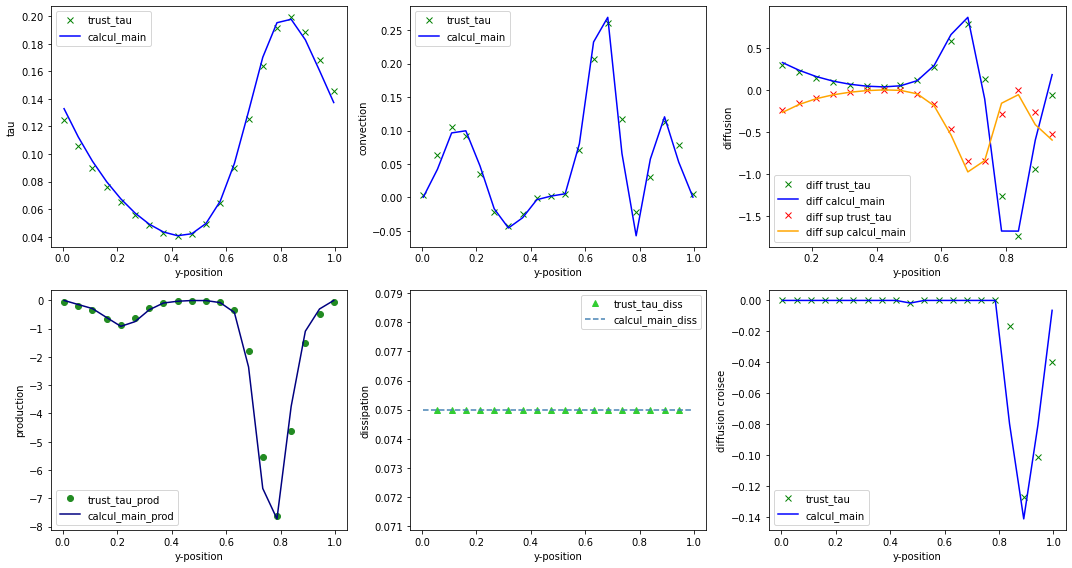

In [7]:
convtau = plot.loadText("K_TAU/K_TAU_CONV_TAU.son")[1::, -1]
difftau = plot.loadText("K_TAU/K_TAU_DIFF_TAU.son")[1::, -1]
prodtau = plot.loadText("K_TAU/K_TAU_PROD_TAU.son")[1::, -1]
disstau = plot.loadText("K_TAU/K_TAU_DISS_TAU.son")[1::, -1]
diffcrtau = plot.loadText("K_TAU/K_TAU_DIFF_CROIS_TAU.son")[1::, -1]
diffsuptau = plot.loadText("K_TAU/K_TAU_DIFF_SUP_TAU.son")[1::, -1]

sourcetau = np.array(prodtau)+np.array(disstau)

cosy = np.cos(2*3.14*y)
siny = np.sin(2*3.14*y)
dydy_tau_ana = 8*3.14**2*0.09*(cosy*(1+2*siny+2*cosy)/(siny+2)**3+(siny-cosy)/(siny+2)**2)

conv_tau_calc = - dy_tau_ana * vy_ana
diff_tau_calc = 0.5*(tau_ana*k_ana*dydy_tau_ana + tau_ana*dy_k_ana*dy_tau_ana + k_ana*dy_tau_ana**2)
diss_tau_calc = np.linspace(0.075, 0.075, 20)
prod_tau_calc = - prod_k_calc * 0.5 * tau_ana/k_ana
diffcrtau_calc = 0.5*tau_ana*np.minimum(dy_k_ana * dy_tau_ana, 0)
diffsup_tau_calc = 0.5 * ( - 2 * k_ana * dy_tau_ana**2)

fig = plt.figure(figsize=(15,8))

plt.title("Verification of initial conditions")

plt.subplot(231)
plt.plot(y, tau, 'xg', label = 'trust_tau')
plt.plot(y, tau_ana, '-b', label = 'calcul_main')
plt.xlabel('y-position')
plt.ylabel('tau')
plt.legend()


plt.subplot(232)
plt.plot(y, convtau, 'xg', label = 'trust_tau')
plt.plot(y, conv_tau_calc, '-b', label = 'calcul_main')
plt.xlabel('y-position')
plt.ylabel('convection')
plt.legend()

plt.subplot(233)
plt.plot(y[2:-1], difftau[2:-1], 'xg', label = 'diff trust_tau')
plt.plot(y[2:-1], diff_tau_calc[2:-1], '-b', label = 'diff calcul_main')
plt.plot(y[2:-1], diffsuptau[2:-1], 'xr', label = 'diff sup trust_tau')
plt.plot(y[2:-1], diffsup_tau_calc[2:-1], '-', color = "orange", label = 'diff sup calcul_main')
plt.xlabel('y-position')
plt.ylabel('diffusion')
plt.legend()

plt.subplot(234)
plt.plot(y, prodtau, 'o', label = 'trust_tau_prod', color ="forestgreen")
plt.plot(y, prod_tau_calc, '-', label = 'calcul_main_prod', color ="navy")
plt.xlabel('y-position')
plt.ylabel('production')
plt.legend()

plt.subplot(235)
plt.plot(y[1:-1], disstau[1:-1], '^', label = 'trust_tau_diss', color ="limegreen")
plt.plot(y, diss_tau_calc, '--', label = 'calcul_main_diss', color ="steelblue")
plt.xlabel('y-position')
plt.ylabel('dissipation')
plt.legend()

plt.subplot(236)
plt.plot(y, diffcrtau, 'xg', label = 'trust_tau')
plt.plot(y, diffcrtau_calc, '-b', label = 'calcul_main')
plt.xlabel('y-position')
plt.ylabel('diffusion croisee')

plt.legend()
plt.tight_layout()

plt.show()

## Termes sources de l'equation de omega : verification que notre calcul analytique est similaire a celui de CMFD au milieu du cube

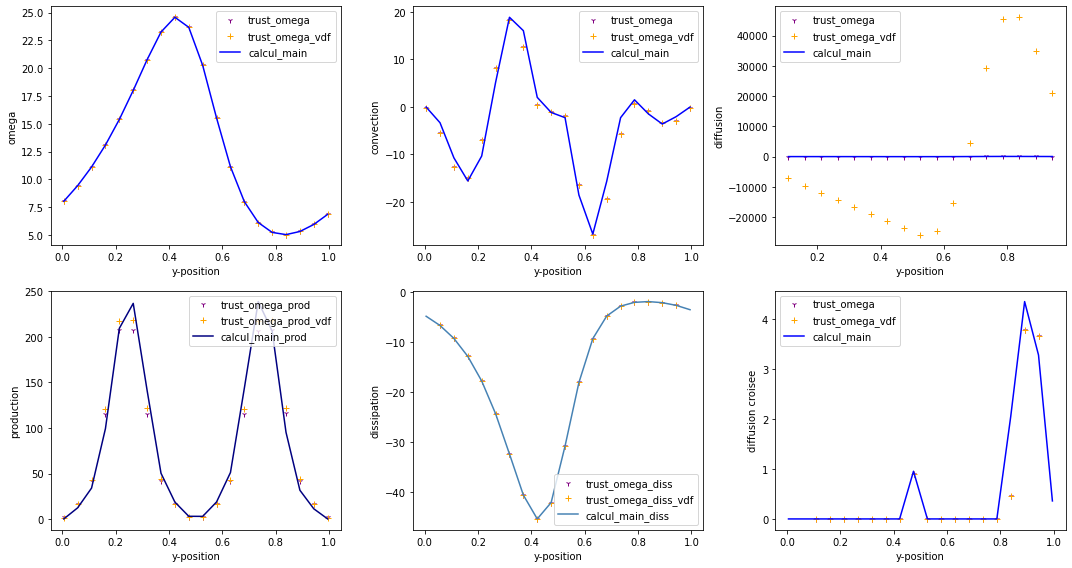

In [8]:
convomega = plot.loadText("K_OMEGA/K_OMEGA_CONV_OMEGA.son")[1::, -1]
diffomega = plot.loadText("K_OMEGA/K_OMEGA_DIFF_OMEGA.son")[1::, -1]
prodomega = plot.loadText("K_OMEGA/K_OMEGA_PROD_OMEGA.son")[1::, -1]
dissomega = plot.loadText("K_OMEGA/K_OMEGA_DISS_OMEGA.son")[1::, -1]
diffcromega = plot.loadText("K_OMEGA/K_OMEGA_DIFF_CROIS_OMEGA.son")[1::, -1]
convomegav= plot.loadText("K_OMEGA_VDF/K_OMEGA_VDF_CONV_OMEGA.son")[1::, -1]
diffomegav= plot.loadText("K_OMEGA_VDF/K_OMEGA_VDF_DIFF_OMEGA.son")[1::, -1]
prodomegav= plot.loadText("K_OMEGA_VDF/K_OMEGA_VDF_PROD_OMEGA.son")[1::, -1]
dissomegav= plot.loadText("K_OMEGA_VDF/K_OMEGA_VDF_DISS_OMEGA.son")[1::, -1]
diffcromegav= plot.loadText("K_OMEGA_VDF/K_OMEGA_VDF_DIFF_CROIS_OMEGA.son")[1::, -1]

sourceomega = np.array(prodomega)+np.array(dissomega)
sourceomegav = np.array(prodomegav)+np.array(dissomegav)

dy_omega_ana = - dy_tau_ana /(tau_ana**2)

cosy = np.cos(2*3.14*y)
siny = np.sin(2*3.14*y)
dydy_omega_ana = - dydy_tau_ana /(tau_ana**2) + 2 * dy_tau_ana**2 / (tau_ana**3)

conv_omega_calc = - dy_omega_ana * vy_ana
diff_omega_calc = 0.5*(dy_k_ana * dy_omega_ana/omega_ana + k_ana /omega_ana * dydy_omega_ana - k_ana/omega_ana**2*dy_omega_ana**2)
diss_omega_calc = - 0.075 * omega_ana*omega_ana
prod_omega_calc = 0.5*prod_k_calc * omega_ana/k_ana
diffcromega_calc = 0.5/omega_ana*np.maximum(dy_k_ana * dy_omega_ana, 0)

fig = plt.figure(figsize=(15,8))

plt.title("Verification of initial conditions")

plt.subplot(231)
plt.plot(y, omega, '1', label = 'trust_omega', color = "purple")
plt.plot(y, omegav, '+', label = 'trust_omega_vdf', color = "orange")
plt.plot(y, omega_ana, '-b', label = 'calcul_main')
plt.xlabel('y-position')
plt.ylabel('omega')
plt.legend()


plt.subplot(232)
plt.plot(y, convomega, '1', label = 'trust_omega', color = "purple")
plt.plot(y, convomegav, '+', label = 'trust_omega_vdf', color = "orange")
plt.plot(y, conv_omega_calc, '-b', label = 'calcul_main')
plt.xlabel('y-position')
plt.ylabel('convection')
plt.legend()

plt.subplot(233)
plt.plot(y[2:-1], diffomega[2:-1], '1', label = 'trust_omega', color = "purple")
plt.plot(y[2:-1], diffomegav[2:-1], '+', label = 'trust_omega_vdf', color = "orange")
plt.plot(y[2:-1], diff_omega_calc[2:-1], '-b', label = 'calcul_main')
plt.xlabel('y-position')
plt.ylabel('diffusion')
plt.legend()

plt.subplot(234)
plt.plot(y, prodomega, '1', label = 'trust_omega_prod', color = "purple")
plt.plot(y, prodomegav, '+', label = 'trust_omega_prod_vdf', color = "orange")
plt.plot(y, prod_omega_calc, '-', label = 'calcul_main_prod', color ="navy")
plt.xlabel('y-position')
plt.ylabel('production')
plt.legend()

plt.subplot(235)
plt.plot(y[1:-1], dissomega[1:-1], '1', label = 'trust_omega_diss', color = "purple")
plt.plot(y[1:-1], dissomegav[1:-1], '+', label = 'trust_omega_diss_vdf', color = "orange")
plt.plot(y, diss_omega_calc, label = 'calcul_main_diss', color ="steelblue")
plt.xlabel('y-position')
plt.ylabel('dissipation')
plt.legend()

plt.subplot(236)
plt.plot(y[2:-1], diffcromega[2:-1], '1', label = 'trust_omega', color = "purple")
plt.plot(y[2:-1], diffcromegav[2:-1], '+', label = 'trust_omega_vdf', color = "orange")
plt.plot(y, diffcromega_calc, '-b', label = 'calcul_main')
plt.xlabel('y-position')
plt.ylabel('diffusion croisee')

plt.legend()
plt.tight_layout()

plt.show()